In [1]:
import numpy as np

import tensorflow as tf
import keras

from __future__ import print_function

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0 

animal_indices = np.where((train_labels >= 2) & (train_labels <= 7))[0]
train_images = train_images[animal_indices]
train_labels = train_labels[animal_indices]

animal_indices = np.where((test_labels >= 2) & (test_labels <=7 ))[0]
test_images = test_images[animal_indices]
test_labels = test_labels[animal_indices]

In [3]:
model0 = models.Sequential()

model0.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model0.add(layers.MaxPooling2D((2, 2)))
model0.add(layers.Conv2D(64, (3, 3), activation='relu'))
model0.add(layers.MaxPooling2D((2, 2)))
model0.add(layers.Conv2D(64, (3, 3), activation='relu'))
model0.add(layers.Flatten())
model0.add(layers.Dense(64, activation='relu'))
model0.add(layers.Dense(10))
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [4]:
model0.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history0 = model0.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 15s 15ms/step - loss: 1.4860 - accuracy: 0.3935 - val_loss: 1.2600 - val_accuracy: 0.5147
Epoch 2/10
938/938 [==============================] - 19s 20ms/step - loss: 1.1864 - accuracy: 0.5448 - val_loss: 1.1746 - val_accuracy: 0.5602
Epoch 3/10
938/938 [==============================] - 23s 25ms/step - loss: 1.0528 - accuracy: 0.6007 - val_loss: 1.0046 - val_accuracy: 0.6275
Epoch 4/10
938/938 [==============================] - 23s 25ms/step - loss: 0.9601 - accuracy: 0.6430 - val_loss: 0.9814 - val_accuracy: 0.6398
Epoch 5/10
938/938 [==============================] - 23s 25ms/step - loss: 0.8884 - accuracy: 0.6682 - val_loss: 0.9518 - val_accuracy: 0.6505
Epoch 6/10
938/938 [==============================] - 23s 25ms/step - loss: 0.8338 - accuracy: 0.6918 - val_loss: 0.9441 - val_accuracy: 0.6492
Epoch 7/10
938/938 [==============================] - 23s 25ms/step - loss: 0.7815 - accuracy: 0.7114 - val_loss: 0.8720 - val_accuracy:

188/188 - 2s - loss: 0.8586 - accuracy: 0.6923 - 2s/epoch - 9ms/step


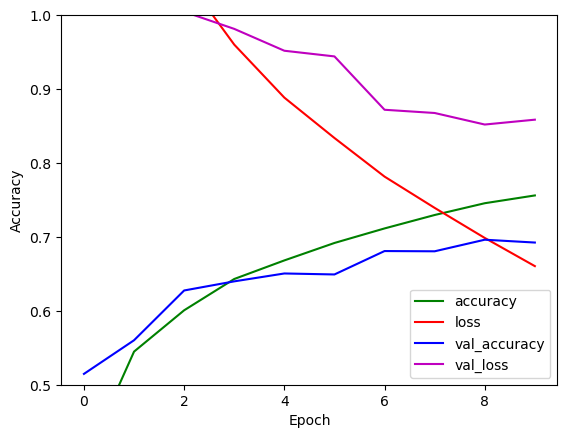

In [5]:
plt.plot(history0.history['accuracy'], label='accuracy', c = 'g')
plt.plot(history0.history['loss'], label='loss', c = 'r')
plt.plot(history0.history['val_accuracy'], label = 'val_accuracy', c = 'b')
plt.plot(history0.history['val_loss'], label='val_loss', c = 'm')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model0.evaluate(test_images,  test_labels, verbose=2)

le CNN et plus précis mais plus lent

maintenant avec la couche de Batch Normalization

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 32s 32ms/step - loss: 1.3042 - accuracy: 0.4919 - val_loss: 1.2685 - val_accuracy: 0.5330
Epoch 2/10
938/938 [==============================] - 30s 32ms/step - loss: 1.0139 - accuracy: 0.6179 - val_loss: 1.1353 - val_accuracy: 0.5730
Epoch 3/10
938/938 [==============================] - 30s 32ms/step - loss: 0.8696 - accuracy: 0.6759 - val_loss: 1.0482 - val_accuracy: 0.6218
Epoch 4/10
938/938 [==============================] - 30s 32ms/step - loss: 0.7828 - accuracy: 0.7105 - val_loss: 1.1624 - val_accuracy: 0.5830
Epoch 5/10
938/938 [==============================] - 30s 32ms/step - loss: 0.7058 - accuracy: 0.7416 - val_loss: 0.9343 - val_accuracy: 0.6675
Epoch 6/10
938/938 [==============================] - 30s 32ms/step - loss: 0.6274 - accuracy: 0.7718 - val_loss: 0.9168 - val_accuracy: 0.6733
Epoch 7/10
938/938 [==============================] - 30s 32ms/step - loss: 0.5662 - accuracy: 0.7894 - val_loss: 0.9890 - val_accuracy:

188/188 - 2s - loss: 1.1467 - accuracy: 0.6567 - 2s/epoch - 11ms/step


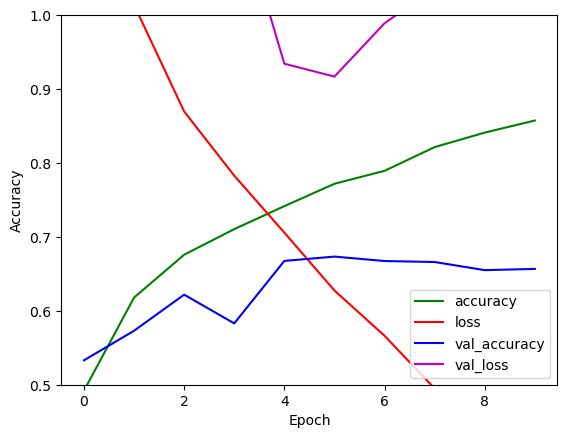

In [8]:
plt.plot(history.history['accuracy'], label='accuracy', c = 'g')
plt.plot(history.history['loss'], label='loss', c = 'r')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', c = 'b')
plt.plot(history.history['val_loss'], label='val_loss', c = 'm')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [9]:
pred = model.predict(test_images)

188/188 [==============================] - 2s 11ms/step


In [10]:
pred_classes = np.argmax(pred, axis= 1)

Text(0.5, 1.0, 'Confusion Matrix')

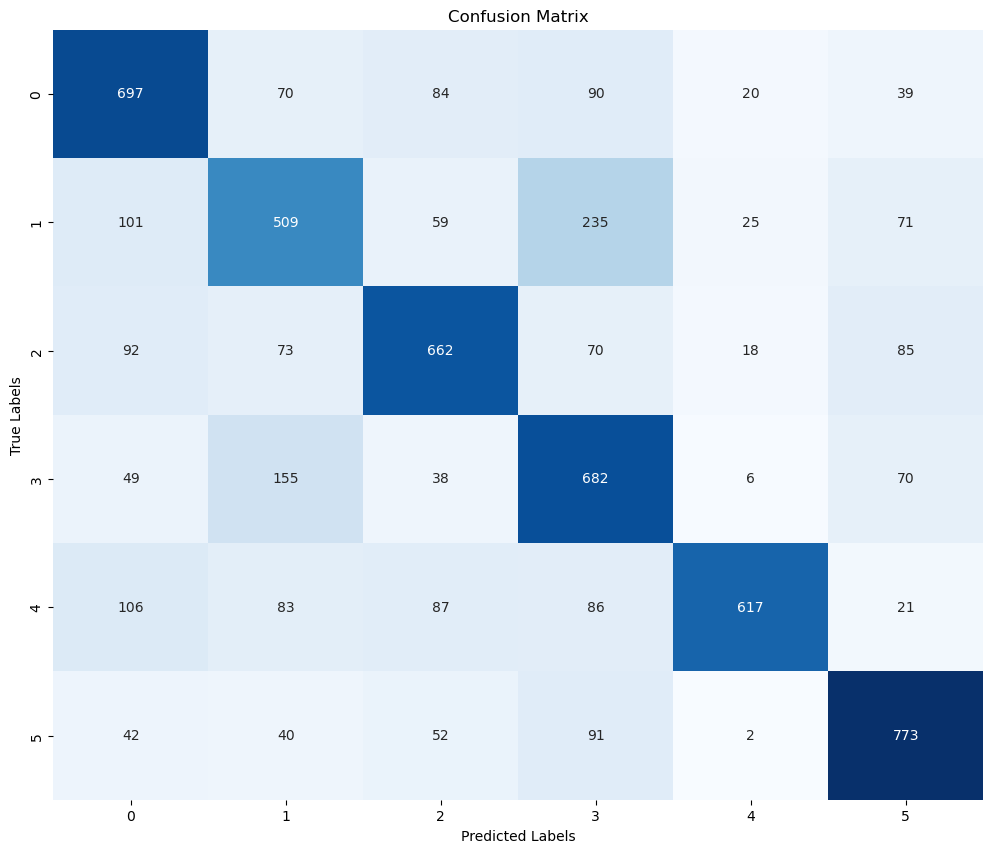

In [11]:
true_labels = test_labels

# Get the predicted class labels from 'pred_classes'
predicted_labels = pred_classes

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix using heatmap
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix') 

la couche de Batch Normalization rend légérement plus préci

maintenent on test le dropout

In [12]:
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))
model2.add(layers.Dropout(0.25))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [13]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 26s 25ms/step - loss: 1.6830 - accuracy: 0.3434 - val_loss: 1.3036 - val_accuracy: 0.5070
Epoch 2/10
938/938 [==============================] - 24s 25ms/step - loss: 1.4401 - accuracy: 0.4517 - val_loss: 1.1605 - val_accuracy: 0.5543
Epoch 3/10
938/938 [==============================] - 24s 25ms/step - loss: 1.3331 - accuracy: 0.4947 - val_loss: 1.0490 - val_accuracy: 0.6095
Epoch 4/10
938/938 [==============================] - 24s 26ms/step - loss: 1.2556 - accuracy: 0.5205 - val_loss: 1.0502 - val_accuracy: 0.6130
Epoch 5/10
938/938 [==============================] - 25s 26ms/step - loss: 1.1955 - accuracy: 0.5443 - val_loss: 0.9580 - val_accuracy: 0.6443
Epoch 6/10
938/938 [==============================] - 24s 25ms/step - loss: 1.1423 - accuracy: 0.5607 - val_loss: 0.9729 - val_accuracy: 0.6440
Epoch 7/10
938/938 [==============================] - 24s 26ms/step - loss: 1.1055 - accuracy: 0.5751 - val_loss: 0.9283 - val_accuracy:

188/188 - 2s - loss: 0.8952 - accuracy: 0.6723 - 2s/epoch - 9ms/step


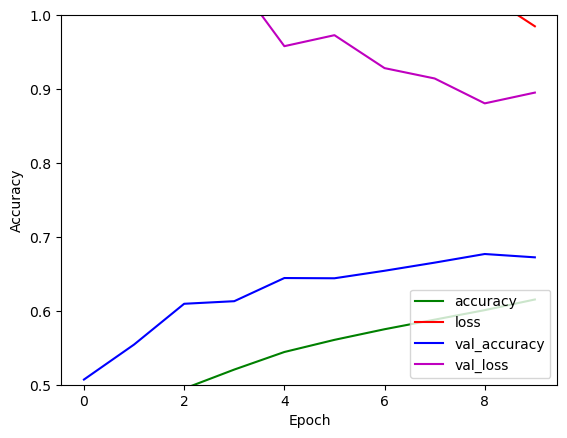

In [14]:
plt.plot(history2.history['accuracy'], label='accuracy', c = 'g')
plt.plot(history2.history['loss'], label='loss', c = 'r')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy', c = 'b')
plt.plot(history2.history['val_loss'], label='val_loss', c = 'm')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

le model dropout et moins performent

In [15]:
model3 = models.Sequential()

model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [16]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history3 = model3.fit(train_images, train_labels, epochs=1000, 
                    validation_data=(test_images, test_labels),
                    callbacks=callbacks)

Epoch 1/1000
938/938 [==============================] - 26s 26ms/step - loss: 1.4675 - accuracy: 0.4060 - val_loss: 1.2985 - val_accuracy: 0.4902
Epoch 2/1000
938/938 [==============================] - 24s 26ms/step - loss: 1.1760 - accuracy: 0.5469 - val_loss: 1.0958 - val_accuracy: 0.5772
Epoch 3/1000
938/938 [==============================] - 24s 26ms/step - loss: 1.0470 - accuracy: 0.6028 - val_loss: 1.0714 - val_accuracy: 0.5952
Epoch 4/1000
938/938 [==============================] - 24s 26ms/step - loss: 0.9593 - accuracy: 0.6389 - val_loss: 0.9881 - val_accuracy: 0.6295
Epoch 5/1000
938/938 [==============================] - 24s 25ms/step - loss: 0.8937 - accuracy: 0.6672 - val_loss: 0.9408 - val_accuracy: 0.6447
Epoch 6/1000
938/938 [==============================] - 24s 26ms/step - loss: 0.8316 - accuracy: 0.6950 - val_loss: 0.9085 - val_accuracy: 0.6628
Epoch 7/1000
938/938 [==============================] - 24s 25ms/step - loss: 0.7837 - accuracy: 0.7108 - val_loss: 0.9014 -

188/188 - 2s - loss: 0.9074 - accuracy: 0.6730 - 2s/epoch - 9ms/step


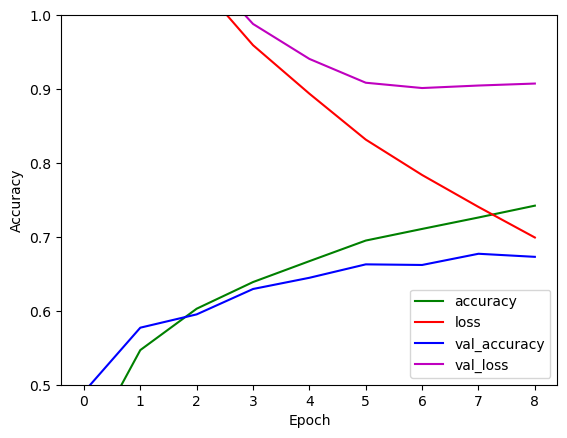

In [17]:
plt.plot(history3.history['accuracy'], label='accuracy', c = 'g')
plt.plot(history3.history['loss'], label='loss', c = 'r')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy', c = 'b')
plt.plot(history3.history['val_loss'], label='val_loss', c = 'm')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

                       Cela me paraît des plus efficace. Maintenant je vais essaiyer tous les parametres mis

In [18]:
modelf = models.Sequential()

modelf.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modelf.add(BatchNormalization())
modelf.add(layers.MaxPooling2D((2, 2)))
modelf.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelf.add(layers.MaxPooling2D((2, 2)))
modelf.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelf.add(layers.Flatten())
modelf.add(layers.Dense(64, activation='relu'))
modelf.add(layers.Dense(10))
modelf.add(layers.Dropout(0.25))

modelf.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

In [19]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

modelf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

historyf = modelf.fit(train_images, train_labels, epochs=1000, 
                    validation_data=(test_images, test_labels),
                    callbacks=callbacks)

Epoch 1/1000
938/938 [==============================] - 33s 32ms/step - loss: 1.5481 - accuracy: 0.4096 - val_loss: 1.5346 - val_accuracy: 0.4125
Epoch 2/1000
938/938 [==============================] - 30s 32ms/step - loss: 1.3205 - accuracy: 0.4951 - val_loss: 1.0313 - val_accuracy: 0.6173
Epoch 3/1000
938/938 [==============================] - 30s 31ms/step - loss: 1.1973 - accuracy: 0.5436 - val_loss: 1.0582 - val_accuracy: 0.5963
Epoch 4/1000
938/938 [==============================] - 30s 32ms/step - loss: 1.1285 - accuracy: 0.5709 - val_loss: 0.9275 - val_accuracy: 0.6553
Epoch 5/1000
938/938 [==============================] - 30s 32ms/step - loss: 1.0587 - accuracy: 0.5909 - val_loss: 0.9385 - val_accuracy: 0.6587
Epoch 6/1000
938/938 [==============================] - 30s 31ms/step - loss: 0.9910 - accuracy: 0.6173 - val_loss: 0.9345 - val_accuracy: 0.6652


188/188 - 2s - loss: 0.9074 - accuracy: 0.6730 - 2s/epoch - 9ms/step


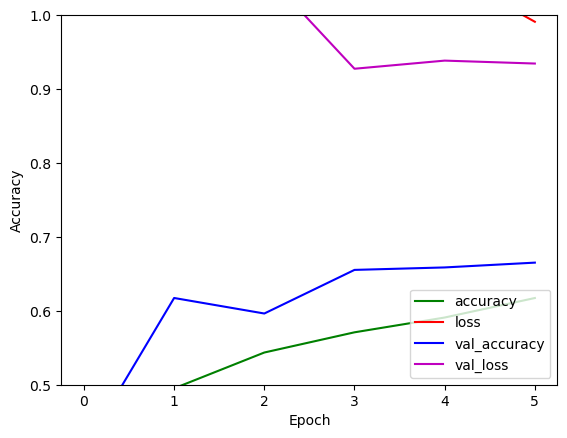

In [20]:
plt.plot(historyf.history['accuracy'], label='accuracy', c = 'g')
plt.plot(historyf.history['loss'], label='loss', c = 'r')
plt.plot(historyf.history['val_accuracy'], label = 'val_accuracy', c = 'b')
plt.plot(historyf.history['val_loss'], label='val_loss', c = 'm')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

on note que le dernier model est absolument catastrophique 